<a href="https://colab.research.google.com/github/kondjiri/Satellite-Imagery-and-Deep-Learning/blob/master/Satellite_Imagery_Classification_Using_VGG16_Pretrained_Model_In_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multispectral Image scene Classification using Deep Neural Network**

###This is our Graduation Project

*   **Rouina Hafida Ghizlène**
*   **Fané Kondjiri**







## **Importing Neccessary Modules**


In [ ]:
import cv2
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Model,Sequential
from keras.layers import Input,Conv2D,MaxPool2D,Flatten,Dropout,Dense
from keras.utils.np_utils import to_categorical
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

## **Importing My Google Drive into Goolge Colab**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **Imoporting our Dataset**

In [ ]:
pickle_out = open('/content/drive/My Drive/DataSet/X.pickle','rb')
data = pickle.load(pickle_out)
pickle_out.close()

pickle_out = open('/content/drive/My Drive/DataSet/Y.pickle','rb')
label = pickle.load(pickle_out)
pickle_out.close()

In [ ]:
train_data = np.array(data).reshape(-1,224,224,3)
train_label = np.array(label).reshape(-1,1)

## **Different Categories in our Dataset**

In [ ]:
CATEGORY = ['agricultural',
            'airplane',
            'baseballdiamond',
            'beach',
            'buildings',
            'chaparral',
            'denseresidential',
            'forest',
            'freeway',
            'golfcourse',
            'harbor',
            'intersection',
            'mediumresidential',
            'mobilehomepark',
            'overpass',
            'parkinglot',
            'river',
            'runway',
            'sparseresidential',
            'storagetanks',
            'tenniscourt'
           ]

## **Defining our Label Dictionnary**

In [ ]:
dict_class = {i : category for i,category in enumerate(CATEGORY)}

## **Plotting some images from our Dataset**

Text(0.5, 1.0, 'runway')

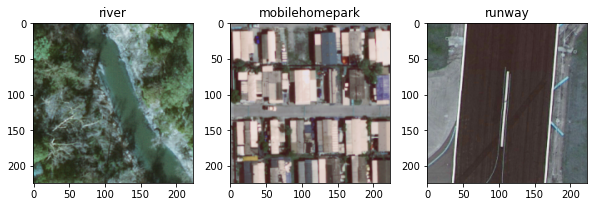

In [ ]:
plt.figure(figsize=([10,10]))
plt.subplot(331)
plt.imshow(train_data[0])
plt.title(dict_class[int(train_label[0][0])])
plt.subplot(332)
plt.imshow(train_data[1])
plt.title(dict_class[int(train_label[1][0])])
plt.subplot(333)
plt.imshow(train_data[2])
plt.title(dict_class[int(train_label[2][0])])
# plt.subplot(334)
# plt.imshow(train_data[3])
# plt.title(dict_class[int(train_label[3][0])])
# plt.show()


## **Dividing our Dataset into Train_set & Testing_set**

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(train_data,train_label,test_size=0.2,random_state=2)

## **Normalizing our Different DataSet**

In [ ]:
train_x,test_x = (train_x.astype('float32'))/255,(test_x.astype('float32'))/255

In [ ]:
train_y,test_y = to_categorical(train_y,21),to_categorical(test_y,21)

## **Importing Pretrained model VGG16 & Defining our model to it**


## **Mode def**

In [ ]:
def model_vgg_16():
  model = VGG16(include_top=False,weights='imagenet',pooling='avg',input_shape=(224,224,3))
  for layer in model.layers:
    layer.trainable=False

  x = model.output
  x = Dense(1024, activation = "relu")(x)
  x = Dense(128, activation = "relu")(x)
  pred = Dense(21, activation = "softmax")(x)
  net = Model(inputs=model.input, outputs = pred)
  net.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
  return net

In [ ]:
model_vgg = model_vgg_16()

58892288/58889256 [==============================] - 0s 0us/step


## **Trainning Our Model**

In [ ]:
callbacks = [EarlyStopping(monitor='accuracy',patience=2)]
hist = model_vgg.fit(train_x,train_y,validation_split=0.1,verbose=1,batch_size=128,epochs=100,callbacks=callbacks)

Epoch 1/100
12/12 [==============================] - 23s 2s/step - loss: 2.6933 - accuracy: 0.2619 - val_loss: 2.1680 - val_accuracy: 0.4762
Epoch 2/100
12/12 [==============================] - 11s 947ms/step - loss: 1.8057 - accuracy: 0.5417 - val_loss: 1.4823 - val_accuracy: 0.5893
Epoch 3/100
12/12 [==============================] - 11s 942ms/step - loss: 1.2111 - accuracy: 0.6845 - val_loss: 1.0691 - val_accuracy: 0.6667
Epoch 4/100
12/12 [==============================] - 11s 946ms/step - loss: 0.9052 - accuracy: 0.7388 - val_loss: 0.8542 - val_accuracy: 0.7560
Epoch 5/100
12/12 [==============================] - 11s 945ms/step - loss: 0.7292 - accuracy: 0.7910 - val_loss: 0.7115 - val_accuracy: 0.7798
Epoch 6/100
12/12 [==============================] - 11s 941ms/step - loss: 0.6295 - accuracy: 0.8181 - val_loss: 0.7253 - val_accuracy: 0.7560
Epoch 7/100
12/12 [==============================] - 11s 943ms/step - loss: 0.5682 - accuracy: 0.8426 - val_loss: 0.6524 - val_accuracy: 0.

## **Evaluting our model**

In [ ]:
loss,acc = model_vgg.evaluate(test_x,test_y,verbose=1)
print("Loss: {:0.2f} & Accuracy: {:0.2f} %".format(loss,acc*100))

NameError: ignored

## **Plotting our model performance graph**

In [ ]:
for performance in ['loss','accuracy','val_loss','val_accuracy']:
  plt.plot(hist.history[performance],label=performance)
  plt.legend()
plt.show()